In [1]:
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os

In [2]:
date = str('2018-05-07 23:59:59.999999') 
print(date)

date = date[:date.rfind(':')].replace(' ', '_') 
print(date)

date = date.replace(':','시') + '분' 
print(date)

2018-05-07 23:59:59.999999
2018-05-07_23:59
2018-05-07_23시59분


In [3]:
query = input('검색 키워드를 입력하세요 : ') 
query = query.replace(' ', '+') 

news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : ')) 

검색 키워드를 입력하세요 : 금리 인하
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 200


<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="금리 인하 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'금리 인하'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'금리 인하'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>금리 인하 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210520.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pst
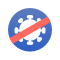
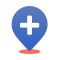
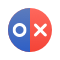
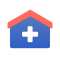

In [4]:
news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')
soup

In [5]:
news_dict = {} 
idx = 0 
cur_page = 1

In [6]:
print()
print('크롤링 중...')

while idx < news_num:
### 네이버 뉴스 웹페이지 구성이 바뀌어 태그명, class 속성 값 등을 수정함(20210126) ###
    
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1
    
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


크롤링 중...


In [7]:
print('크롤링 완료')

print('데이터프레임 변환')
news_df = DataFrame(news_dict).T

folder_path = os.getcwd()
xlsx_file_name = '../output/네이버뉴스_{}_{}.xlsx'.format(query, date)

news_df.to_excel(xlsx_file_name)

print('엑셀 저장 완료 | 경로 : {}\\{}'.format(folder_path, xlsx_file_name))
os.startfile(folder_path)

크롤링 완료
데이터프레임 변환
엑셀 저장 완료 | 경로 : C:\Users\Administrator\Anaconda3\datascience\upbit\../output/네이버뉴스_금리+인하_2018-05-07_23시59분.xlsx


In [9]:
import pandas as pd 

na_2018 = pd.read_excel('../output/네이버뉴스_금리+인하_2018-05-07_23시59분.xlsx', index_col = 0)
na_2018 .tail(50)

title  \
150                    '코로나19' 자영업자 지원 금리, 2%대로 인하된다   
151                    카드·캐피탈업계, 법정 최고금리 인하 소급 적용 합의   
152                         최고금리 인하 보완책, 내년 상반기 중 마련   
153                         중기중앙회, 중소기업공제기금 대출 금리 인하   
154                       7월부터 대부업 대출 최고금리 연 20%로 인하   
155                文대통령 “최고금리인하 매우 기뻐…4차 지원금 지급에 속도”   
156                    은행마다 다른 금리인하요구권 신청요건·수용기준 손본다   
157                 최고금리 인하 두 달 앞으로…우수 대부업체 은행 대출 추진   
158                  웰컴저축銀, 서울신보 보증부대출 금리 연 3.9%로 인하   
159              2금융권 최고금리 선제 인하 확산하나…JT저축은행 3개월째 시행   
160              2금융권 최고금리 선제 인하 확산하나…JT저축은행 3개월째 시행   
161                            카드·캐피털社도 최고금리 인하 소급적용   
162                 웰컴저축銀, 서울신보 보증부대출 금리 최저 3.9%로 인하   
163                    7월 7일부터 법정 최고금리 인하… 연 24%→20%   
164               식용 옥수수 연말까지 무관세 수입…사료 원료구매자금 금리 인하   
165           소상공인 2차 금융지원 금리 최대 2%p 인하…1000만원 추가 지원   
166       "카드·캐피털사도 최고금리 인하 나섰다"… 기존 차주에 연 20% 소급 적용   
167                       금리인하요구권 수용률, 농협은행 96% ‘최고’   
168                     내년 하반기부터 법정 최고금리 24%→20%로 인하   
169  카카오뱅크, 중저신용자 대출 금리 인하...토스뱅크 출범·케이뱅크 선전에 선제적 대응   
170                     내년 하반기부터 법정 최고금리 24%→20%로 인하   
171  카카오뱅크, 중저신용자 대출 금리 인하...토스뱅크 출범·케이뱅크 선전에 선제적 대응   
172                        7월 7일부터 법정최고금리 24%→20% 인하   
173                      카뱅, 중저신용자 대출금리 인하…최대 1.2%p↓   
174                 대부업 최고금리 20%로 인하, 햇살론17 금리도 떨어진다   
175                   "카드·캐피탈업계, 법정 최고금리 인하 소급적용 합의"   
176               "연말까지 수입옥수수 128만톤 무관세…원료구매시 금리 인하"   
177        대출금리 인하 나선 OK·페퍼저축은행… "연 20% 고금리 취급 안할 것"   
178                    與민병덕 "금리인하요구권 확대를 위한 법안 대표발의"   
179                “고용 유지하면 금리 인하”…중진공, 2천억원 지원자금 신설   
180                “고용 유지하면 금리 인하”…중진공, 2천억원 지원자금 신설   
181                         고금리 대출 대환상품 공급·햇살론 금리 인하   
182                  어업인 대상 금리 인하 등 금융 지원, 올해 말까지 연장   
183                     카카오뱅크, 중금리 대출 공급 확대 시동…금리 인하   
184                  케이뱅크, 정기예금 등 수신금리 내일부터 0.1%p 인하   
185              법정 최고금리 인하.."내년 상반기 서민금융 공급 개편안 마련"   
186           농협은 96%, 신한은 43%…금리인하요구권 수용률이 제각각인 이유는   
187                          최고금리 인하 후속조치…대부중개수수료 인하   
188            오늘부터 소상공인 코로나 대출 2차 지원… 금리 연 2~3%대 인하   
189                 새해 달라지는 금융...4세대 실손보험 등장·최고금리 인하   
190                      케이뱅크, 내일부터 수신상품 금리 0.1%p 인하   
191                 새해 달라지는 금융...4세대 실손보험 등장·최고금리 인하   
192                   '0%대 은행금리' 굳어진다...우리은행 예금금리 인하   
193                           5대 은행, 금리인하요구권 수용률 제각각   
194           주거안정 월세대출 금리 인하...국토부, 무주택 서민 주거 지원 강화   
195                          7월 7일부터 법정 최고금리 20%로 인하   
196                7월부터 법정최고금리 20%로 인하...저신용자 숨통 트일까   
197           은행, 식당·노래방 등 대출금리 1%p 인하...이자 최대 70만원↓   
198                  전남도, 음식점·식품업체 등 시설개선 융자금리 1% 인하   
199                 금리 인하되는 중금리대출… 카드·저축은행 “영업확대 기회”   

                                                   url  
150                http://www.inews24.com/view/1334704  
151  https://view.asiae.co.kr/article/2021042520391...  
152        https://www.sedaily.com/NewsView/1ZBVF0ERCP  
153       http://yna.kr/AKR20210309133700030?did=1195m  
154        https://www.sedaily.com/NewsView/22K0BX189B  
155      https://news.joins.com/article/olink/23618412  
156       http://yna.kr/AKR20210306049900002?did=1195m  
157  http://www.edaily.co.kr/news/newspath.asp?news...  
158  https://biz.sbs.co.kr/article_hub/20000011441?...  
159  http://news.mk.co.kr/newsRead.php?no=303450&ye...  
160  http://news.mk.co.kr/newsRead.php?no=303450&ye...  
161  https://www.hankyung.com/economy/article/20210...  
162  https://view.asiae.co.kr/article/2021041410135...  
163  http://www.kbiznews.co.kr/news/articleView.htm...  
164  http://www.newsis.com/view/?id=NISX20210407_00...  
165  https://view.asiae.co.kr/article/2021011316343...  
166  http://moneys.mt.co.kr/news/mwView.php?no=2021...  
167  http://www.segye.com/content/html/2021/03/15/2...  
168  http://www.wowtv.co.kr/NewsCenter/News/Read?ar...  
169           http://psnews.co.kr/View.aspx?No=162